# Practice: Basic Pandas 

In this practice assignment, you will test and review the pandas fundamentals including: 

- open csv files
- manipulate dataframe indexes
- examine basic dataframe statistics
- plot dataframe contents using
    - bar charts
    - histograms
    - scatter plots 

Data for this assignment in `.csv` format downloaded from the [USGS Earthquakes Database](https://earthquake.usgs.gov/earthquakes/search/).

You don't need to download this file. I have placed it into the `Data` folder for this week. This is the same folder as the `Palmer Penguins` data.

#### 1) Import pandas and matplotlib

This is similar to how we started our analysis.

In [2]:
import pandas as pd 

#### 2) Use Pandas’ read_csv function to open the dataset 

(Don’t use any special options). Display the first few rows and the DataFrame info.

In [3]:
df = pd.read_csv('../Data/usgs_earthquake_data.csv')
df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2025-01-01T01:51:40.783Z,38.751200,-119.215000,10.4000,2.60,ml,26,38.71,0.13500,0.1378,...,2025-03-17T21:33:58.040Z,"11 km ESE of Smith, Nevada",earthquake,NaN,1.300000,0.240000,9.0,reviewed,nn,nn
1,2025-01-01T05:57:00.230Z,44.920700,-74.480400,6.2450,2.50,mb_lg,19,79.00,0.31000,0.5700,...,2025-03-17T21:34:00.040Z,"6 km SSE of Fort Covington Hamlet, New York",earthquake,1.770000,6.132000,0.255000,4.0,reviewed,us,us
2,2025-01-01T07:27:29.330Z,39.427166,-123.285500,6.4300,2.87,md,41,45.00,0.05798,0.0900,...,2025-03-17T21:34:01.040Z,"6 km E of Willits, CA",earthquake,0.160000,0.630000,0.140000,50.0,automatic,nc,nc
3,2025-01-01T08:42:04.180Z,39.702167,-110.821833,-3.4200,2.54,ml,31,46.00,0.06737,0.1900,...,2025-03-17T21:34:01.040Z,"2 km NW of Kenilworth, Utah",earthquake,0.270000,0.800000,0.178676,18.0,reviewed,uu,uu
4,2025-01-01T12:24:17.738Z,31.630000,-104.521000,7.0483,2.70,ml,8,75.00,0.00000,0.3000,...,2025-03-17T21:34:03.040Z,"62 km SSW of Whites City, New Mexico",earthquake,3.098379,1.757224,0.100000,25.0,reviewed,tx,tx


#### 3) Getting a basic overview of the data 

- Use `.info` to learn more about the columns
- Use `.describe()` to get basic descriptive statistics 

In [4]:
df.describe()

,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst
count,2554.000000,2554.000000,2554.000000,2554.000000,2554.000000,2554.000000,2551.000000,2554.000000,2248.000000,2554.000000,2428.000000,2517.000000
mean,37.435279,-112.518324,8.019383,2.907459,47.725137,87.348500,0.267163,0.269053,1.288548,2.087783,0.149114,56.330950
std,4.797979,9.351118,6.051866,0.408322,37.073260,64.060496,0.350577,0.216100,1.754498,3.875910,0.085087,61.304607
min,24.814900,-124.996667,-3.420000,2.500000,4.000000,11.000000,0.000000,0.000000,0.060000,0.000000,0.000000,0.000000
25%,32.473275,-119.563875,5.000000,2.600000,21.000000,46.000000,0.038070,0.130000,0.220000,0.480251,0.097000,17.000000
50%,37.456083,-115.606167,7.074000,2.800000,36.000000,67.000000,0.111800,0.200000,0.590000,0.916836,0.143000,34.000000
75%,41.059075,-104.411875,10.000000,3.100000,64.000000,111.000000,0.336000,0.300000,1.530000,1.945000,0.200000,75.000000
max,49.692800,-68.868900,68.340000,5.600000,228.000000,358.180000,4.014000,1.370000,11.800000,31.610000,0.600000,447.000000


#### 4) Assign data to a new column

Examine the `place` column. There is information about the location (U.S. State) in there. 

Using [pandas string methods](https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html) we can extract the information about the U.S. State. The piece of code below, will split the text in each column at the `","` and then return the second element (python starts counting at 0) as a series.   

`df['place'].str.split(',').str.get(1)`

You can look this up in the documentation, but you don't need to know how to do this. 

Assign this series to a new column in your dataframe called: `state`

In [6]:
#df['place'].str.split(',').str.get(1)
df['state']=df['place'].str.split(',').str.get(1)
df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource,state
0,2025-01-01T01:51:40.783Z,38.751200,-119.215000,10.4000,2.60,ml,26,38.71,0.13500,0.1378,...,"11 km ESE of Smith, Nevada",earthquake,NaN,1.300000,0.240000,9.0,reviewed,nn,nn,Nevada
1,2025-01-01T05:57:00.230Z,44.920700,-74.480400,6.2450,2.50,mb_lg,19,79.00,0.31000,0.5700,...,"6 km SSE of Fort Covington Hamlet, New York",earthquake,1.770000,6.132000,0.255000,4.0,reviewed,us,us,New York
2,2025-01-01T07:27:29.330Z,39.427166,-123.285500,6.4300,2.87,md,41,45.00,0.05798,0.0900,...,"6 km E of Willits, CA",earthquake,0.160000,0.630000,0.140000,50.0,automatic,nc,nc,CA
3,2025-01-01T08:42:04.180Z,39.702167,-110.821833,-3.4200,2.54,ml,31,46.00,0.06737,0.1900,...,"2 km NW of Kenilworth, Utah",earthquake,0.270000,0.800000,0.178676,18.0,reviewed,uu,uu,Utah
4,2025-01-01T12:24:17.738Z,31.630000,-104.521000,7.0483,2.70,ml,8,75.00,0.00000,0.3000,...,"62 km SSW of Whites City, New Mexico",earthquake,3.098379,1.757224,0.100000,25.0,reviewed,tx,tx,New Mexico


#### 5) Get unique values for the new column

Use the [`.unique()` method](https://pandas.pydata.org/docs/reference/api/pandas.Series.unique.html) to display all the unique values for this new column

What do you notice and what does this mean for working with the dataset

In [7]:
df['state'].unique()
# Not consistent - some of the states are abbreviated
#Some states are placed twice ex: Oregon and OR
# We have to clean data manually

#df['state'].loc[df['state']=='CA'] = ' California'
#df['state'].loc[df


array([' Nevada', ' New York', ' CA', ' Utah', ' New Mexico', ' Montana',
       ' Texas', ' Nebraska', ' Wyoming', ' Arkansas', ' B.C.',
       ' Louisiana', ' Virginia', ' Mexico', ' Idaho', ' Colorado',
       ' California', ' Washington', ' Kansas', ' Maine', ' Oregon',
       ' Ohio', ' OR', ' Canada', ' Arizona', ' Oklahoma', ' Georgia',
       ' South Dakota', ' Minnesota', ' Illinois', ' Mississippi',
       ' Tennessee', ' Missouri', ' South Carolina', ' Kentucky',
       ' Alabama', ' Pennsylvania', ' Iowa', ' New Jersey', ' Indiana',
       ' North Carolina', ' NV', ' Maryland'], dtype=object)

#### 6) Filter the dataset

Create a new filtered dataframe tha only has Earthquakes of magnitude 4 or larger. 

In [8]:
df_large = df.loc[df.mag >=4]
df_large.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource,state
21,2025-01-02T02:34:04.660Z,38.845500,-122.756333,1.420,4.65,mw,115,44.0,0.009316,0.08,...,"4 km NW of Cobb, CA",earthquake,0.090000,0.150000,NaN,21.0,reviewed,nc,nc,CA
58,2025-01-09T03:52:17.871Z,31.666000,-104.357000,5.946,4.20,ml,28,57.0,0.100000,0.10,...,"56 km S of Whites City, New Mexico",earthquake,0.778876,0.928857,0.200,21.0,reviewed,tx,tx,New Mexico
166,2025-01-23T18:08:47.730Z,32.329167,-115.385833,14.740,4.37,ml,40,60.0,0.113100,0.34,...,"18 km W of Delta, B.C., MX",earthquake,0.450000,0.930000,0.139,183.0,reviewed,ci,ci,B.C.
181,2025-01-26T14:03:01.190Z,40.334833,-124.942833,7.040,4.13,mw,177,231.0,0.461300,0.30,...,"56 km WNW of Petrolia, CA",earthquake,0.700000,1.030000,NaN,7.0,reviewed,nc,nc,CA
192,2025-01-27T16:32:14.552Z,44.406800,-114.668100,9.190,4.20,mwr,72,35.0,0.327000,0.77,...,"26 km NW of Clayton, Idaho",earthquake,2.220000,5.392000,0.026,146.0,reviewed,us,us,Idaho


#### 7) Make a histogram 

Make a histogram the distribution of the Earthquake magnitudes

Use the plotting functionality to create a histogram for the magnitude column of the complete dataset.

The pandas plotting methods use `matplotlib` as a basis. Look up in the [histogram documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html) how to set the y-axis to logarithmic. 

Give the plot labels and titles to make it nicer. 

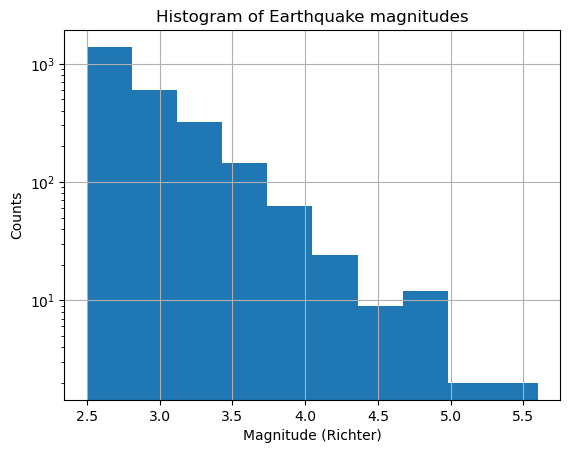

In [12]:

df['mag'].plot(kind='hist', bins = 10, title='Histogram of Earthquake magnitudes', log = True, 
               ylabel ='Counts', xlabel = 'Magnitude (Richter)')
#Log is standard to false so make it true
# With log the line is somewhat straight telling us mag is logarithmic


#### 8) Visualize earthquake locations

Create two plots, one for the filtered and non-filtered dataset each. 

Visualize the locations of earthquakes by making a scatterplot of their latitude and longitude. 

See whether you can use the [scatter documentation](matplotlib.pyplot.scatter) to figure out how to color the points by magnitude. 

What difference do you note between the filtered and unfiltered datasets?

<Axes: xlabel='longitude', ylabel='latitude'>

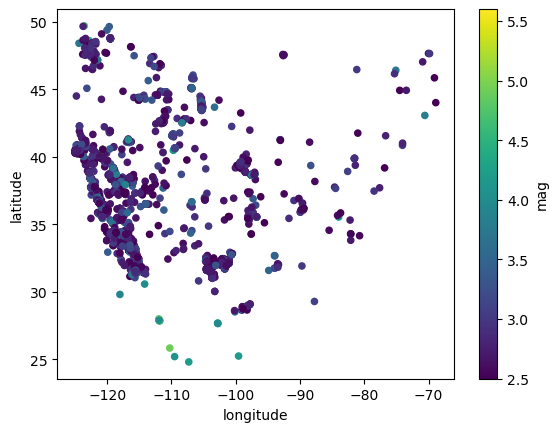

In [9]:
df.plot(kind='scatter', x='longitude', y = 'latitude', c = 'mag')
# c = color
# most earthquakes appear to be located in california

#### Make a bar plot of earthquake locations

Get the value counts for the `state` column and create a bar plot with the earthquake count on the y-axis and the location on the x-axis. 

<Axes: xlabel='state'>

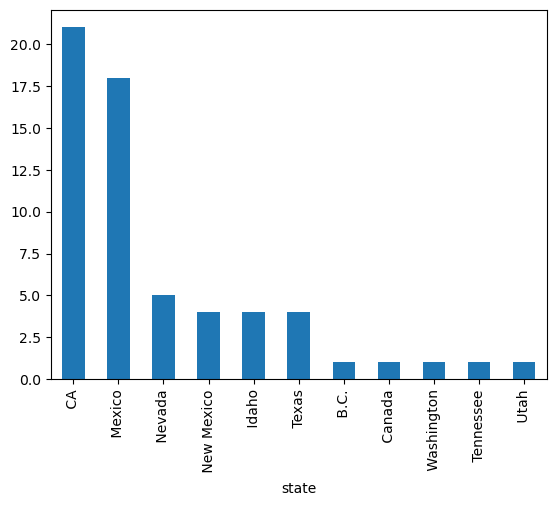

In [39]:
df_large['state'].value_counts().plot.bar()